In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split    # Choose between models
from sklearn import preprocessing    # Scaling, transforming and wrangling data
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline    # Cross-validation
from sklearn.model_selection import GridSearchCV    # Cross-validation
from sklearn.metrics import mean_squared_error, r2_score    # Evaluation
#from sklearn.externals import joblib    # Persist the model. Alternative to pickle. Better for large numpy arrays

In [2]:
data = pd.read_csv('C:/Users/USER\Desktop/Decision/adult.csv')   # Load from remote

In [3]:
print (data.head)
print (data.shape)

<bound method NDFrame.head of        age         workclass   education  education-num      marital-status  \
0       39         State-gov   Bachelors             13       Never-married   
1       50  Self-emp-not-inc   Bachelors             13  Married-civ-spouse   
2       38           Private     HS-grad              9            Divorced   
3       53           Private        11th              7  Married-civ-spouse   
4       28           Private   Bachelors             13  Married-civ-spouse   
...    ...               ...         ...            ...                 ...   
32556   27           Private  Assoc-acdm             12  Married-civ-spouse   
32557   40           Private     HS-grad              9  Married-civ-spouse   
32558   58           Private     HS-grad              9             Widowed   
32559   22           Private     HS-grad              9       Never-married   
32560   52      Self-emp-inc     HS-grad              9  Married-civ-spouse   

       occupation   r

In [4]:
print(data.describe())
data.replace("?",np.nan,inplace=True)
data.dropna(inplace=True)
data['age'] = data['age'].astype(int)
data['hours-per-week'] = data['hours-per-week'].astype(int)
data.loc[data['class'] == '<=50K', 'class'] = 0
data.loc[data['class'] == '>50K', 'class'] = 1

                age  education-num  capital-gain  capital-loss  hours-per-week
count  32561.000000   32561.000000  32561.000000  32561.000000    32561.000000
mean      38.581647      10.080679   1077.648844     87.303830       40.437456
std       13.640433       2.572720   7385.292085    402.960219       12.347429
min       17.000000       1.000000      0.000000      0.000000        1.000000
25%       28.000000       9.000000      0.000000      0.000000       40.000000
50%       37.000000      10.000000      0.000000      0.000000       40.000000
75%       48.000000      12.000000      0.000000      0.000000       45.000000
max       90.000000      16.000000  99999.000000   4356.000000       99.000000


In [5]:
data_categorical= [i for i in data.columns
                       if data[i].dtype.name == 'object']
data_numerical = [i for i in data.columns
                     if data[i].dtype.name != 'object']

In [6]:
from sklearn.preprocessing import LabelEncoder 
le=LabelEncoder()

In [7]:
for col in data.columns:
    if data[col].dtypes == 'object':
        data[col] = le.fit_transform(data[col])

In [8]:

X=data.drop(['class'], axis=1)
y=data['class']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0,stratify=y)
X.shape

(30169, 13)

In [9]:
#標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train[:3]

array([[ 1.10362956, -0.08685219,  0.17697488, -0.43331194, -0.38409087,
         0.17697488, -0.88152506,  0.38610674,  0.69422452, -0.14796121,
        -0.21836787, -0.07642461,  0.26459636],
       [-0.94936622, -0.08685219, -0.34605074,  1.13225449,  0.95039889,
        -0.34605074,  0.9945205 ,  0.38610674,  0.69422452, -0.14796121,
        -0.21836787, -0.07642461,  0.26459636],
       [-1.17747686,  2.55206221,  1.22302613, -0.04192034,  0.95039889,
         1.22302613, -0.25617654,  0.38610674,  0.69422452, -0.14796121,
        -0.21836787, -2.16165124,  0.26459636]])

In [10]:
#import seaborn as sn
#import matplotlib.pyplot as plt
#f= plt.subplots(figsize=(13,13))
#sn.seaborn.heatmap(data.corr(),annot=True,fmt='.1f',color='green')  #We can use a simple seaborn method to draw the heatmaps

In [12]:
from sklearn.svm import SVR
linear_svr = SVR(kernel="linear")

In [13]:
linear_svr.fit(X_train, y_train)

SVR(kernel='linear')

In [14]:
linear_svr_y_predict = linear_svr.predict(X_test)

In [15]:
poly_svr = SVR(kernel="poly")

In [16]:
poly_svr.fit(X_train, y_train)

SVR(kernel='poly')

In [17]:
poly_svr_y_predict = linear_svr.predict(X_test)

In [19]:
poly_svr_y_predict

array([ 0.03946807,  0.944239  , -0.03680519, ...,  0.01216574,
        0.08874065, -0.02831086])

In [23]:
from sklearn import metrics
print("MAPE",metrics.mean_squared_error(y_test, poly_svr_y_predict))
print("RMES",np.sqrt(metrics.mean_squared_error(y_test, poly_svr_y_predict)))

MAPE 0.16897984784694742
RMES 0.41107158482063366


In [24]:
# Score the model
poly_svr.score(X_test, y_test)

-0.3371828147935729

In [11]:

# Establish a model
model = SVR(C=1, cache_size=500, epsilon=1, kernel='rbf')

In [12]:
# Train the model - this will take a minute
model.fit(X_train, y_train)

SVR(C=1, cache_size=500, epsilon=1)

In [18]:
# Score the model
poly_svr.score(X_test, y_test)

0.20051153049772086

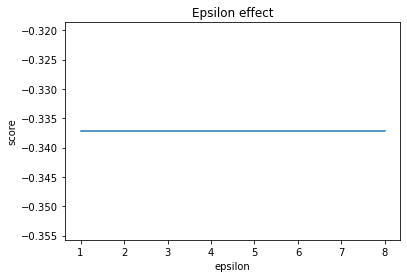

In [21]:
import matplotlib.pyplot as plt
# Not a great score. Try other epsilons - this will take about 5 minutes.
epsilons = np.arange(1, 9)
scores = []
for e in epsilons:
    poly_svr.set_params(epsilon=e)
    poly_svr.fit(X_train, y_train)
    scores.append(poly_svr.score(X_test, y_test))
plt.plot(epsilons, scores)
plt.title("Epsilon effect")
plt.xlabel("epsilon")
plt.ylabel("score")
plt.show()

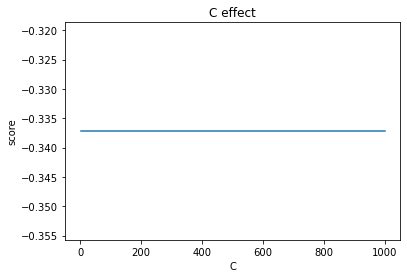

In [15]:
# Try other C's - This will take about a minute or so
model.set_params(epsilon=5)
Cs = [1e0, 1e1, 1e2, 1e3]
scores = []
for c in Cs:
    model.set_params(C=c)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
plt.plot(Cs, scores)
plt.title("C effect")
plt.xlabel("C")
plt.ylabel("score")
plt.show()

In [ ]:
pipeline = make_pipeline(preprocessing.StandardScaler(), 
                         RandomForestRegressor(n_estimators=100))

In [ ]:
print (pipeline.get_params())

In [ ]:
hyperparameters = { 'randomforestregressor__max_features' : ['auto', 'sqrt', 'log2'],
                  'randomforestregressor__max_depth': [None, 5, 3, 1]}

In [ ]:
clf = GridSearchCV(pipeline, hyperparameters, cv=10)    # GridSearchCV: test out all possible permutations

In [ ]:
# Fit and tune model
clf.fit(X_train, y_train)

In [ ]:
print (clf.best_params_)

In [ ]:
print (clf.refit)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
print (r2_score(y_test, y_pred))
print (mean_squared_error(y_test, y_pred))

In [ ]:
joblib.dump(clf, 'rf_regressor.pkl')

In [22]:
from sklearn import metrics
print("MAPE",metrics.mean_squared_error(y_test, y_pred))
print("RMES",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
#from sklearn.metrics import accuracy_score
#print('accuracy score:',accuracy_score(y_test,y_pred))
# test_pred = clf.predict(X_test)
# print("Test Data Confusion Matrix: ", confusion_matrix(y_test, test_pred))
# print ("Test Data Accuracy : ", accuracy_score(y_test,test_pred)*100)
# print("Test Data Report : ", classification_report(y_test, test_pred))

NameError: name 'y_pred' is not defined